In [46]:
#–ò–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sqlalchemy import create_engine
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams.update({'font.size': 10})

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1UGJhTd01_AmzcTnZxiySE5bOGaHkcm8h')
df.head()

Unnamed: 0        player_name team_abbreviation   age  player_height  \
0           0      Dennis Rodman               CHI  36.0         198.12   
1           1  Dwayne Schintzius               LAC  28.0         215.90   
2           2       Earl Cureton               TOR  39.0         205.74   
3           3        Ed O'Bannon               DAL  24.0         203.20   
4           4        Ed Pinckney               MIA  34.0         205.74   

   player_weight                      college country draft_year draft_round  \
0      99.790240  Southeastern Oklahoma State     USA       1986           2   
1     117.933920                      Florida     USA       1990           1   
2      95.254320                Detroit Mercy     USA       1979           3   
3     100.697424                         UCLA     USA       1995           1   
4     108.862080                    Villanova     USA       1985           1   

   ...  pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0  ...  5.7  16.1  3.1        16.1     0.186     0.323    0.100   0.479   
1  ...  2.3   1.5  0.3        12.3     0.078     0.151    0.175   0.430   
2  ...  0.8   1.0  0.4        -2.1     0.105     0.102    0.103   0.376   
3  ...  3.7   2.3  0.6        -8.7     0.060     0.149    0.167   0.399   
4  ...  2.4   2.4  0.2       -11.2     0.109     0.179    0.127   0.611   

   ast_pct   season  
0    0.113  1996-97  
1    0.048  1996-97  
2    0.148  1996-97  
3    0.077  1996-97  
4    0.040  1996-97  

[5 rows x 22 columns]

**–û–ø–∏—Å–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞**


| ‚Ññ | –°—Ç–æ–ª–±–µ—Ü            | –û–ø–∏—Å–∞–Ω–∏–µ                                                                                   |
|---|--------------------|-------------------------------------------------------------------------------------------|
| 1 | index              | –ù–æ–º–µ—Ä —Å—Ç—Ä–æ–∫–∏ –≤ —Ñ–∞–π–ª–µ                                                                      |
| 2 | player_name        | –ò–º—è –∏–≥—Ä–æ–∫–∞                                                                                |
| 3 | team_abbreviation  | –ö—Ä–∞—Ç–∫–æ–µ —Å–æ–∫—Ä–∞—â–µ–Ω–∏–µ –∫–æ–º–∞–Ω–¥—ã                                                                |
| 4 | age                | –í–æ–∑—Ä–∞—Å—Ç –∏–≥—Ä–æ–∫–∞                                                                            |
| 5 | player_height      | –†–æ—Å—Ç –∏–≥—Ä–æ–∫–∞                                                                               |
| 6 | player_weight      | –í–µ—Å –∏–≥—Ä–æ–∫–∞                                                                                |
| 7 | college            | –£—á–µ–±–Ω–æ–µ –∑–∞–≤–µ–¥–µ–Ω–∏–µ –∏–≥—Ä–æ–∫–∞                                                                  |
| 8 | country            | –°—Ç—Ä–∞–Ω–∞ –∏–≥—Ä–æ–∫–∞                                                                             |
| 9 | draft_year         | –ì–æ–¥ –Ω–∞–π–º–∞ (–¥—Ä–∞—Ñ—Ç–∞)                                                                       |
|10 | draft_round        | –†–∞—É–Ω–¥ –Ω–∞–π–º–∞ (–¥—Ä–∞—Ñ—Ç–∞)                                                                     |
|11 | draft_number       | –ù–æ–º–µ—Ä –∏–≥—Ä–æ–∫–∞ –≤ –Ω–∞–π–º–µ (–¥—Ä–∞—Ñ—Ç–µ)                                                             |
|12 | gp                 | –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä –∏–≥—Ä–æ–∫–∞ –∑–∞ —Å–µ–∑–æ–Ω                                                            |
|13 | pts                | –°—Ä–µ–¥–Ω–µ–µ —á–∏—Å–ª–æ –æ—á–∫–æ–≤ –∑–∞ –∏–≥—Ä—É                                                               |
|14 | reb                | –°—Ä–µ–¥–Ω–µ–µ —á–∏—Å–ª–æ –ø–æ–¥–±–æ—Ä–æ–≤ –∑–∞ –∏–≥—Ä—É                                                            |
|15 | ast                | –°—Ä–µ–¥–Ω–µ–µ —á–∏—Å–ª–æ –≥–æ–ª–µ–≤—ã—Ö –ø–∞—Å–æ–≤ –∑–∞ –∏–≥—Ä—É                                                       |
|16 | net_rating         | –†–∞–∑–Ω–∏—Ü–∞ –æ—á–∫–æ–≤ –∫–æ–º–∞–Ω–¥—ã –∑–∞ 100 –≤–ª–∞–¥–µ–Ω–∏–π, –ø–æ–∫–∞ –∏–≥—Ä–æ–∫ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ –ø–ª–æ—â–∞–¥–∫–µ                   |
|17 | oreb_pct           | –ü—Ä–æ—Ü–µ–Ω—Ç –¥–æ—Å—Ç—É–ø–Ω—ã—Ö –ø–æ–¥–±–æ—Ä–æ–≤ –≤ –Ω–∞–ø–∞–¥–µ–Ω–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ –∏–≥—Ä–æ–∫ –∑–∞—Ö–≤–∞—Ç–∏–ª, –Ω–∞—Ö–æ–¥—è—Å—å –Ω–∞ –ø–ª–æ—â–∞–¥–∫–µ       |
|18 | dreb_pct           | –ü—Ä–æ—Ü–µ–Ω—Ç –¥–æ—Å—Ç—É–ø–Ω—ã—Ö –ø–æ–¥–±–æ—Ä–æ–≤ –≤ –∑–∞—â–∏—Ç–µ, –∫–æ—Ç–æ—Ä—ã–µ –∏–≥—Ä–æ–∫ –∑–∞—Ö–≤–∞—Ç–∏–ª, –Ω–∞—Ö–æ–¥—è—Å—å –Ω–∞ –ø–ª–æ—â–∞–¥–∫–µ          |
|19 | usg_pct            | –ü—Ä–æ—Ü–µ–Ω—Ç –∫–æ–º–∞–Ω–¥–Ω—ã—Ö –∏–≥—Ä, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–Ω—ã—Ö –∏–≥—Ä–æ–∫–æ–º, –ø–æ–∫–∞ –æ–Ω –Ω–∞—Ö–æ–¥–∏–ª—Å—è –Ω–∞ –ø–ª–æ—â–∞–¥–∫–µ               |
|20 | ts_pct             | –ú–µ—Ä–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –±—Ä–æ—Å–∫–∞ –∏–≥—Ä–æ–∫–∞, —É—á–∏—Ç—ã–≤–∞—é—â–∞—è —à—Ç—Ä–∞—Ñ–Ω—ã–µ –±—Ä–æ—Å–∫–∏, 2- –∏ 3-–æ—á–∫–æ–≤—ã–µ –±—Ä–æ—Å–∫–∏      |
|21 | ast_pct            | –ü—Ä–æ—Ü–µ–Ω—Ç –±—Ä–æ—Å–∫–æ–≤ —Å –∏–≥—Ä—ã —Ç–æ–≤–∞—Ä–∏—â–µ–π –ø–æ –∫–æ–º–∞–Ω–¥–µ, –∫–æ—Ç–æ—Ä—ã–º –∏–≥—Ä–æ–∫ –∞—Å—Å–∏—Å—Ç–∏—Ä–æ–≤–∞–ª, –Ω–∞—Ö–æ–¥—è—Å—å –Ω–∞ –ø–ª–æ—â–∞–¥–∫–µ |
|22 | season             | –°–µ–∑–æ–Ω                                                                                     |


####–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
#–£–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–Ω—É–∂–Ω–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞
df = df.drop('Unnamed: 0', axis = 1)

In [ ]:
df.shape

(12305, 21)

#–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –≤ –±–∞–∑—É –¥–∞–Ω–Ω—ã—Ö

In [ ]:
#–°–æ–∑–¥–∞–Ω–∏–µ –ø–æ–¥–∫–ª—é—á–µ–Ω–∏—è
engine = create_engine('sqlite:///database.db', echo = True)

In [ ]:
#–í—ã–≥—Ä—É–∑–∫–∞ –≤ –ë–î
df.to_sql('sport_df', con=engine, if_exists='replace')

In [ ]:
#–í –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è, –∫–∞–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ, —Ç–∞–∫ –∏ —á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã
df.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [ ]:
#–ü—Ä–æ—Å–º–æ—Ç—Ä –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤
df.describe()

age  player_height  player_weight            gp           pts  \
count  12305.000000   12305.000000   12305.000000  12305.000000  12305.000000   
mean      27.084518     200.611602     100.369926     51.290532      8.172775   
std        4.335868       9.146321      12.477150     25.095909      5.974957   
min       18.000000     160.020000      60.327736      1.000000      0.000000   
25%       24.000000     193.040000      90.718400     31.000000      3.600000   
50%       26.000000     200.660000      99.790240     57.000000      6.700000   
75%       30.000000     208.280000     108.862080     73.000000     11.500000   
max       44.000000     231.140000     163.293120     85.000000     36.100000   

                reb           ast    net_rating      oreb_pct      dreb_pct  \
count  12305.000000  12305.000000  12305.000000  12305.000000  12305.000000   
mean       3.559155      1.813986     -2.255733      0.054473      0.141014   
std        2.483550      1.794155     12.673254      0.043599      0.062704   
min        0.000000      0.000000   -250.000000      0.000000      0.000000   
25%        1.800000      0.600000     -6.400000      0.021000      0.096000   
50%        3.000000      1.200000     -1.300000      0.041000      0.131000   
75%        4.700000      2.400000      3.200000      0.084000      0.180000   
max       16.300000     11.700000    300.000000      1.000000      1.000000   

            usg_pct        ts_pct       ast_pct  
count  12305.000000  12305.000000  12305.000000  
mean       0.184891      0.511060      0.131358  
std        0.053390      0.101163      0.094483  
min        0.000000      0.000000      0.000000  
25%        0.149000      0.480000      0.066000  
50%        0.181000      0.524000      0.103000  
75%        0.217000      0.561000      0.178000  
max        1.000000      1.500000      1.000000

In [ ]:
#–ü—Ä–æ—Å–º–æ—Ç—Ä –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤
df.describe(include = ['object'])

player_name team_abbreviation   college country draft_year  \
count          12305             12305     10516   12305      12305   
unique          2463                36       346      82         47   
top     Vince Carter               CLE  Kentucky     USA  Undrafted   
freq              22               433       420   10308       2224   

       draft_round draft_number   season  
count        12305        12305    12305  
unique           9           76       26  
top              1    Undrafted  2021-22  
freq          7071         2277      605

In [ ]:
#–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–ª–∏—á–∏—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
df.isna().sum()

player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1789
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

#–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–æ—Å—Ç–∞ –æ—Ç –≤–µ—Å–∞ –∏–≥—Ä–æ–∫–∞


##–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

In [ ]:
#–í—ã–±–∏—Ä–∞–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∏–≥—Ä–æ–∫–æ–≤, –±–µ—Ä–µ–º —Å—Ä–µ–¥–Ω–µ–µ –ø–æ —Ä–æ—Å—Ç—É –∏ –≤–µ—Å—É
data = df[['player_name', 'player_height', 'player_weight']].groupby(['player_name'], as_index=False).mean(numeric_only=True)
data.head(5)

player_name  player_height  player_weight
0     A.C. Green         205.74     102.058200
1  A.J. Bramlett         208.28     102.965384
2    A.J. Guyton         185.42      81.646560
3     AJ Hammons         213.36     117.933920
4       AJ Price         187.96      84.821704

In [ ]:
data.shape

(2463, 3)

In [ ]:
X = data[['player_weight']]
y = data['player_height']
#–†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [ ]:
linear_regression = Pipeline([
    ('Scaler', StandardScaler()),
    ('LR', LinearRegression())
])

linear_regression.fit(X_train, y_train)

print('R2 –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏:', round(linear_regression.score(X_train, y_train), 3))
print('R2 –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏:', round(linear_regression.score(X_test, y_test), 3))

R2 –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: 0.672
R2 –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: 0.684


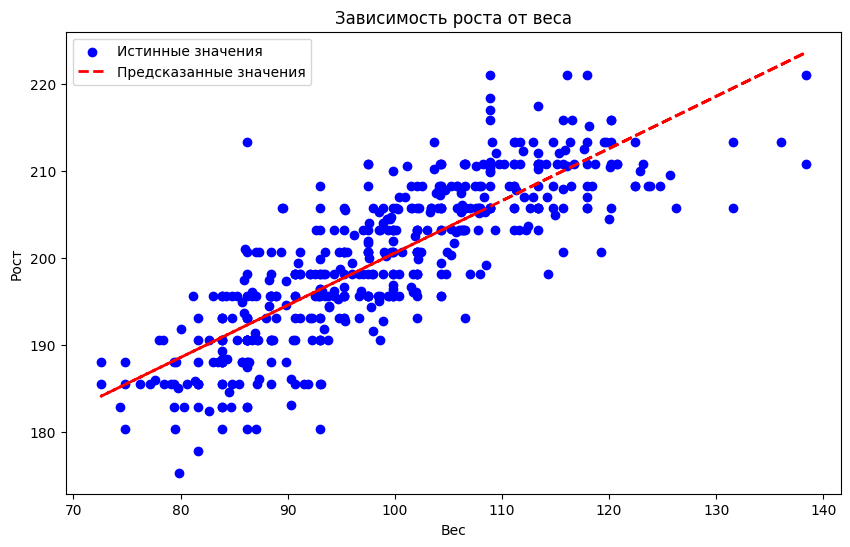

In [ ]:
plt.scatter(X_test, y_test, color='blue', label = '–ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.plot(X_test, linear_regression.predict(X_test), 'r--', lw = 2, label = '–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.xlabel('–í–µ—Å')
plt.ylabel('–†–æ—Å—Ç')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–æ—Å—Ç–∞ –æ—Ç –≤–µ—Å–∞')
plt.legend()
plt.show()

##–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

In [ ]:
#–ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –∫–ª–∞—Å—Å—ã –ø–æ —Ä–æ—Å—Ç—É: –≤—ã—Å–æ–∫–∏–π –∏ –Ω–∏–∑–∫–∏–π
data['height_category'] = data['player_height'].apply(lambda x: 1 if x > data['player_height'].mean() else 0)


In [ ]:
data.head()

player_name  player_height  player_weight  height_category
0     A.C. Green         205.74     102.058200                1
1  A.J. Bramlett         208.28     102.965384                1
2    A.J. Guyton         185.42      81.646560                0
3     AJ Hammons         213.36     117.933920                1
4       AJ Price         187.96      84.821704                0

In [ ]:
X = data[['player_weight']]
y = data['height_category']
#–†–∞–∑–¥–µ–ª–∏–º –∏—Ö –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [ ]:
logistic_regression = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

logistic_regression.fit(X_train, y_train)

print('–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:', round(logistic_regression.score(X_train, y_train), 3))
print('–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:', round(logistic_regression.score(X_test, y_test), 3))

–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.836
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.85


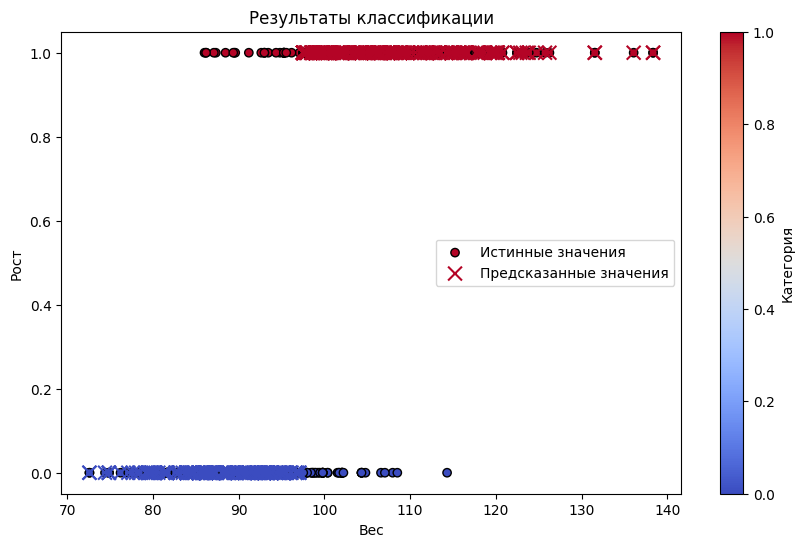

In [ ]:
y_pred = logistic_regression.predict(X_test)
plt.scatter(X_test, y_test, c=y_test, cmap='coolwarm', edgecolors='k', label='–ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.scatter(X_test, y_pred, c=y_pred, cmap='coolwarm', marker='x', s=100, label='–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.xlabel('–í–µ—Å')
plt.ylabel('–†–æ—Å—Ç')
plt.title('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏')
plt.legend()
plt.colorbar(label='–ö–∞—Ç–µ–≥–æ—Ä–∏—è')
plt.show()

##SVM

In [ ]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

svm_pipeline.fit(X_train, y_train)

train_accuracy = svm_pipeline.score(X_train, y_train)
test_accuracy = svm_pipeline.score(X_test, y_test)

print('–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:', round(train_accuracy, 3))
print('–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:', round(test_accuracy, 3))

–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.838
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.844


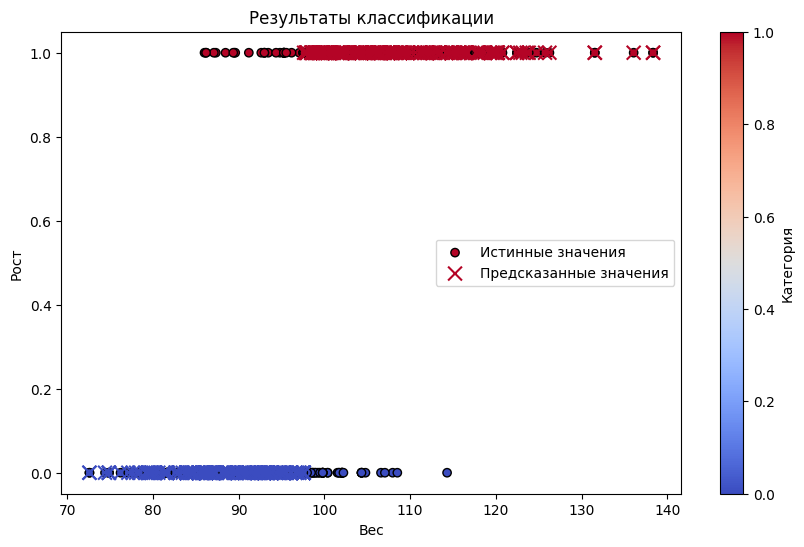

In [ ]:
y_pred = svm_pipeline.predict(X_test)
plt.scatter(X_test, y_test, c=y_test, cmap='coolwarm', edgecolors='k', label='–ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.scatter(X_test, y_pred, c=y_pred, cmap='coolwarm', marker='x', s=100, label='–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.xlabel('–í–µ—Å')
plt.ylabel('–†–æ—Å—Ç')
plt.title('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏')
plt.legend()
plt.colorbar(label='–ö–∞—Ç–µ–≥–æ—Ä–∏—è')
plt.show()


#–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞–∑–≤–∞–Ω–∏—è –∫–æ–º–∞–Ω–¥—ã

–ò—Å–ø–æ–ª—å–∑—É—è –∞–ª–≥–æ—Ä–∏—Ç–º –î–µ—Ä–µ–≤–∞ –ü—Ä–∏–Ω—è—Ç–∏—è –†–µ—à–µ–Ω–∏—è –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å
–Ω–∞–∑–≤–∞–Ω–∏–µ –∫–æ–º–∞–Ω–¥—ã (team_abbreviation) –∫–∞–∫ —Ü–µ–ª–µ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ (Y) –∑–∞ —Å–µ–∑–æ–Ω 2010-11 –æ—Ç —Å–ª–µ–¥—É—é—â–∏—Ö –∞—Ç—Ä–∏–±—É—Ç–æ–≤ (ùëã)
- –°—Ä–µ–¥–Ω–µ–µ pts –≤—Å–µ—Ö –∏–≥—Ä–æ–∫–æ–≤ –∫–æ–º–∞–Ω–¥—ã –∑–∞ —Å–µ–∑–æ–Ω
- –°—Ä–µ–¥–Ω–µ–µ reb –≤—Å–µ—Ö –∏–≥—Ä–æ–∫–æ–≤ –∫–æ–º–∞–Ω–¥—ã –∑–∞ —Å–µ–∑–æ–Ω
- –°—Ä–µ–¥–Ω–µ–µ ast –≤—Å–µ—Ö –∏–≥—Ä–æ–∫–æ–≤ –∫–æ–º–∞–Ω–¥—ã –∑–∞ —Å–µ–∑–æ–Ω
- –°—Ä–µ–¥–Ω–µ–µ player_height –≤—Å–µ—Ö –∏–≥—Ä–æ–∫–æ–≤ –∫–æ–º–∞–Ω–¥—ã –∑–∞ —Å–µ–∑–æ–Ω
- –°—Ä–µ–¥–Ω–µ–µ player_width –≤—Å–µ—Ö –∏–≥—Ä–æ–∫–æ–≤ –∫–æ–º–∞–Ω–¥—ã –∑–∞ —Å–µ–∑–æ–Ω


In [ ]:
# –í—ã–±–æ—Ä —Å–µ–∑–æ–Ω–∞ –∏ –ø–æ–¥—Å—á–µ—Ç —Å—Ä–µ–¥–Ω–∏—Ö
data = df[df['season'] == '2010-11']
data = data[['team_abbreviation', 'pts', 'reb', 'ast', 'player_height', 'player_weight']].groupby(['team_abbreviation'], as_index = False).mean(numeric_only = True)
data.head(5)

team_abbreviation       pts       reb       ast  player_height  \
0               ATL  7.892857  3.435714  1.828571       203.2000   
1               BOS  8.437500  3.525000  2.000000       200.9775   
2               CHA  6.668750  3.175000  1.512500       201.6125   
3               CHI  8.300000  3.928571  1.828571       200.6600   
4               CLE  8.506250  3.875000  1.787500       200.9775   

   player_weight  
0     105.298143  
1     103.674121  
2     102.001501  
3      99.207050  
4     102.426744

In [ ]:
X = data.drop('team_abbreviation', axis=1)
Y = data['team_abbreviation']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=28)

In [ ]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

print('–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:', round(DTC.score(X_train, y_train), 3))
print('–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:', round(DTC.score(X_test, y_test), 3))

–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: 1.0
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.0


#–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –∏–≥—Ä–æ–∫–æ–≤ –ø–æ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏

–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –∏–≥—Ä–æ–∫–æ–≤ –±—É–¥–µ—Ç –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç—å –ø–æ **ts_pct** - –º–µ—Ä–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –±—Ä–æ—Å–∫–∞ –∏–≥—Ä–æ–∫–∞, —É—á–∏—Ç—ã–≤–∞—é—â–∞—è —à—Ç—Ä–∞—Ñ–Ω—ã–µ –±—Ä–æ—Å–∫–∏, 2- –∏ 3-–æ—á–∫–æ–≤—ã–µ –±—Ä–æ—Å–∫–∏, –ø–æ—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —ç—Ç–æ–π –≤–µ–ª–∏—á–∏–Ω—ã –∏ —Å–æ–∑–¥–∞–¥–∏–º –Ω–æ–≤—ã–π –≤—ã—á–∏—Å–ª—è–µ–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –æ–±–æ–∑–Ω–∞—á–∞—é—â–∏–π –Ω–∞—Å–∫–æ–ª—å–∫–æ –±—ã–ª —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–µ–Ω –∏–≥—Ä–æ–∫ –≤ —Å–µ–∑–æ–Ω–µ.

In [ ]:
df['ts_pct'].describe()

count    12305.000000
mean         0.511060
std          0.101163
min          0.000000
25%          0.480000
50%          0.524000
75%          0.561000
max          1.500000
Name: ts_pct, dtype: float64

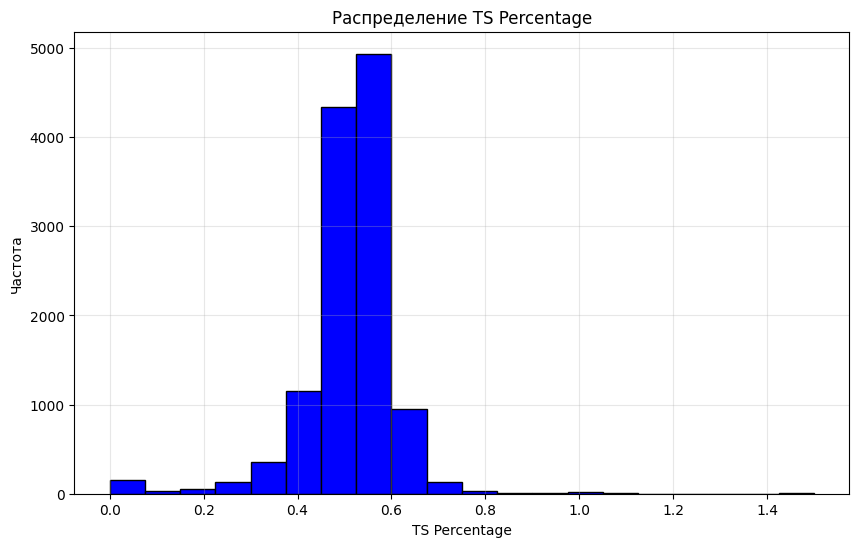

In [ ]:
plt.hist(df['ts_pct'], bins=20, color='blue', edgecolor='black')
plt.xlabel('TS Percentage')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ TS Percentage')
plt.grid(True, alpha=0.3)
plt.show()

In [71]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≥—Ä–∞–Ω–∏—Ü –∫–ª–∞—Å—Å–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–≤–∞–Ω—Ç–∏–ª–µ–π
low_threshold = df['ts_pct'].quantile(0.25)
mid_threshold = df['ts_pct'].quantile(0.5)
high_threshold = df['ts_pct'].quantile(0.75)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ TS Percentage
def classify_ts_percentage(ts_pct):
    if ts_pct < low_threshold:
        return '–ù–∏–∑–∫–∞—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å'
    elif ts_pct < mid_threshold:
        return '–°—Ä–µ–¥–Ω—è—è'
    elif ts_pct < high_threshold:
        return '–í—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ'
    else:
        return '–í—ã—Å–æ–∫–∞—è'

df['efficiency_class'] = df['ts_pct'].apply(classify_ts_percentage)

# –í—ã–≤–æ–¥ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–∞–∂–¥–æ–º –∫–ª–∞—Å—Å–µ
print(df['efficiency_class'].value_counts())


efficiency_class
–°—Ä–µ–¥–Ω—è—è                 3093
–í—ã—Å–æ–∫–∞—è                 3089
–í—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ           3077
–ù–∏–∑–∫–∞—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å    3046
Name: count, dtype: int64


In [72]:
df

player_name team_abbreviation   age  player_height  \
0          Dennis Rodman               CHI  36.0         198.12   
1      Dwayne Schintzius               LAC  28.0         215.90   
2           Earl Cureton               TOR  39.0         205.74   
3            Ed O'Bannon               DAL  24.0         203.20   
4            Ed Pinckney               MIA  34.0         205.74   
...                  ...               ...   ...            ...   
12300    Markieff Morris               MIA  32.0         205.74   
12301     Markelle Fultz               ORL  24.0         193.04   
12302       Marcus Smart               BOS  28.0         193.04   
12303     Marcus Garrett               MIA  23.0         195.58   
12304       Micah Potter               DET  24.0         208.28   

       player_weight                      college country draft_year  \
0          99.790240  Southeastern Oklahoma State     USA       1986   
1         117.933920                      Florida     USA       1990   
2          95.254320                Detroit Mercy     USA       1979   
3         100.697424                         UCLA     USA       1995   
4         108.862080                    Villanova     USA       1985   
...              ...                          ...     ...        ...   
12300     111.130040                       Kansas     USA       2011   
12301      94.800728                   Washington     USA       2017   
12302      99.790240               Oklahoma State     USA       2014   
12303      92.986360                       Kansas     USA  Undrafted   
12304     112.490816                    Wisconsin     USA  Undrafted   

      draft_round draft_number  ...   reb  ast  net_rating  oreb_pct  \
0               2           27  ...  16.1  3.1        16.1     0.186   
1               1           24  ...   1.5  0.3        12.3     0.078   
2               3           58  ...   1.0  0.4        -2.1     0.105   
3               1            9  ...   2.3  0.6        -8.7     0.060   
4               1           10  ...   2.4  0.2       -11.2     0.109   
...           ...          ...  ...   ...  ...         ...       ...   
12300           1           13  ...   2.6  1.4         4.5     0.059   
12301           1            1  ...   2.7  5.5        -5.3     0.010   
12302           1            6  ...   3.8  5.9         9.3     0.018   
12303   Undrafted    Undrafted  ...   1.9  0.6         5.8     0.072   
12304   Undrafted    Undrafted  ...   3.0  0.0       -56.4     0.095   

       dreb_pct  usg_pct  ts_pct  ast_pct   season      efficiency_class  
0         0.323    0.100   0.479    0.113  1996-97  –ù–∏–∑–∫–∞—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å  
1         0.151    0.175   0.430    0.048  1996-97  –ù–∏–∑–∫–∞—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å  
2         0.102    0.103   0.376    0.148  1996-97  –ù–∏–∑–∫–∞—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å  
3         0.149    0.167   0.399    0.077  1996-97  –ù–∏–∑–∫–∞—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å  
4         0.179    0.127   0.611    0.040  1996-97               –í—ã—Å–æ–∫–∞—è  
...         ...      ...     ...      ...      ...                   ...  
12300     0.089    0.197   0.547    0.116  2021-22         –í—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ  
12301     0.116    0.265   0.517    0.448  2021-22               –°—Ä–µ–¥–Ω—è—è  
12302     0.093    0.179   0.540    0.245  2021-22         –í—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ  
12303     0.108    0.086   0.280    0.069  2021-22  –ù–∏–∑–∫–∞—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å  
12304     0.125    0.148   0.505    0.000  2021-22               –°—Ä–µ–¥–Ω—è—è  

[12305 rows x 22 columns]

–í—ã–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å–æ—Å—Ç–æ–∏—Ç –≤ —Ç–æ–º, —á—Ç–æ–±—ã –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º—ã—Ö –∫–ª–∞—Å—Å–æ–≤. –ï—Å–ª–∏ —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏ –∑–∞–º–µ—Ç–Ω–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Ä–∞–∑–ª–∏—á–∏—è –≤ –º–µ–¥–∏–∞–Ω–µ, –∏–Ω—Ç–µ—Ä–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–æ–º —Ä–∞–∑–º–∞—Ö–µ), —Ç–æ –ø—Ä–∏–∑–Ω–∞–∫, –≤–µ—Ä–æ—è—Ç–Ω–æ, –≤–∞–∂–µ–Ω –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

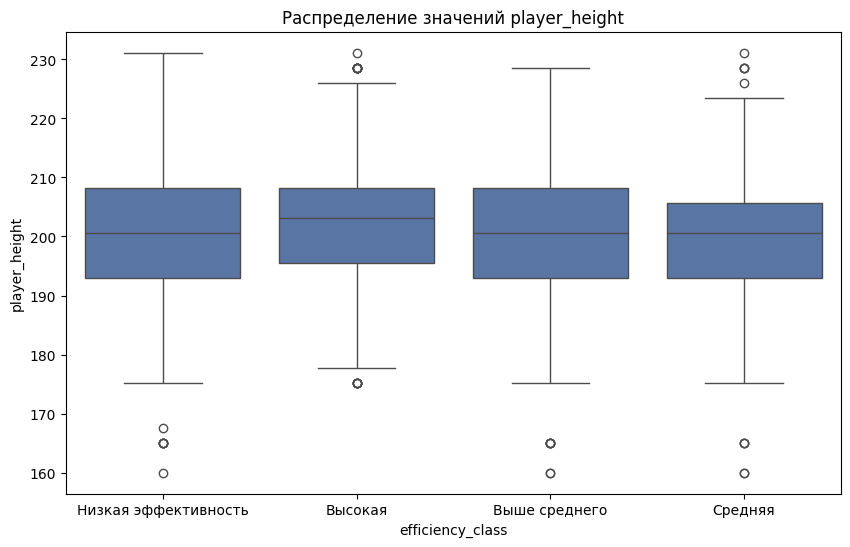

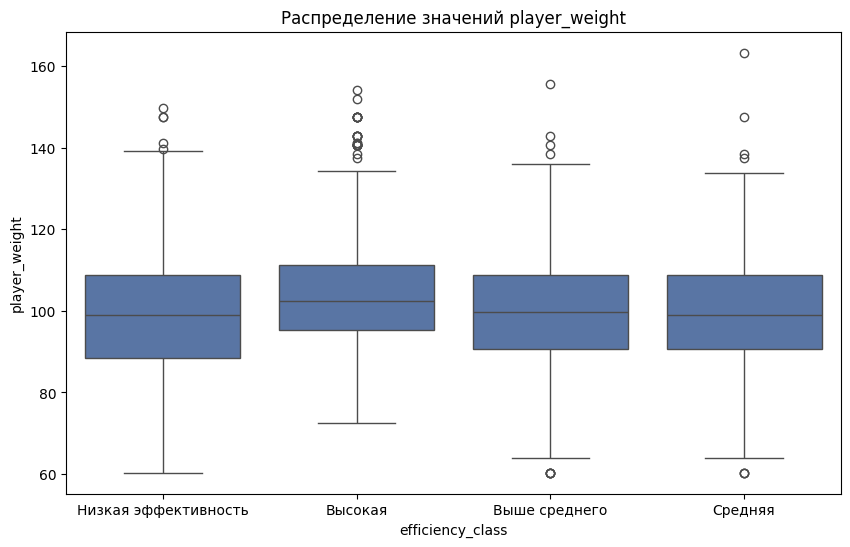

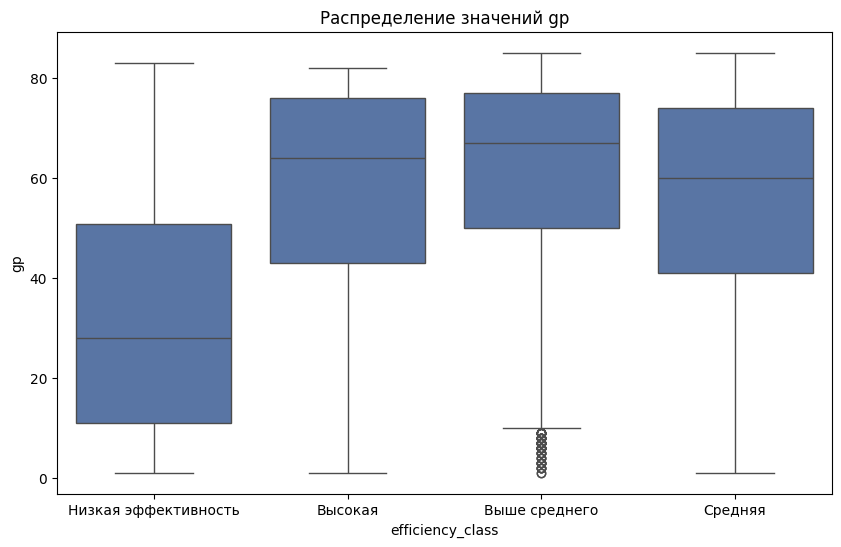

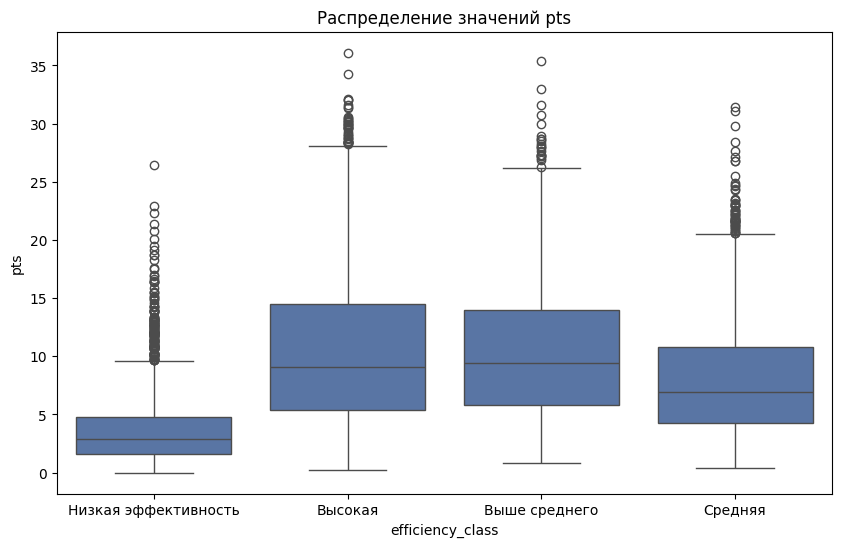

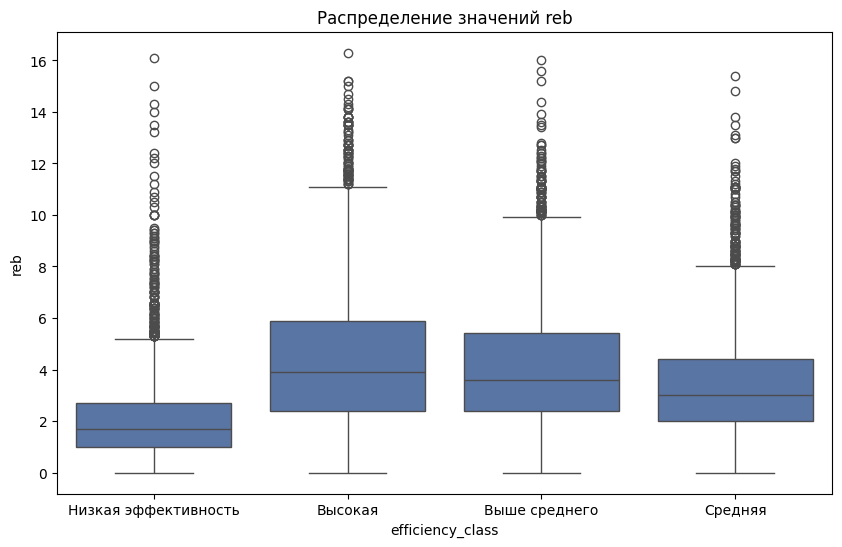

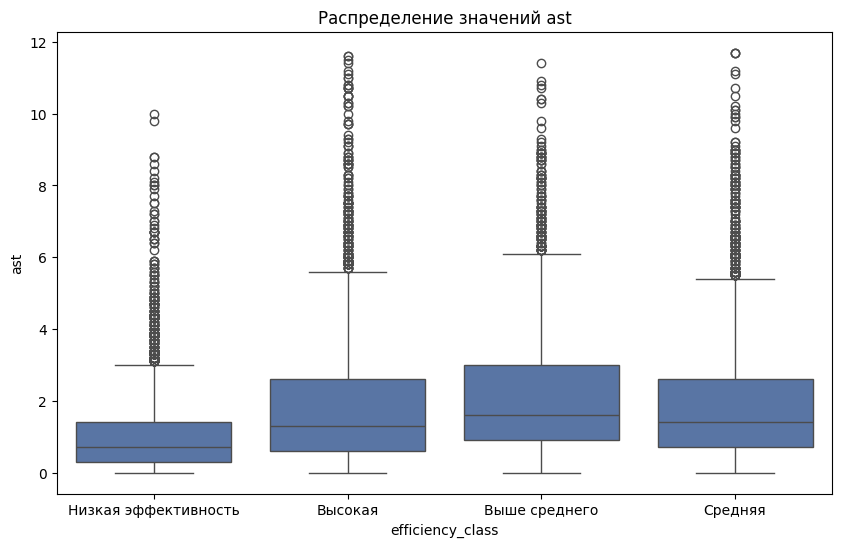

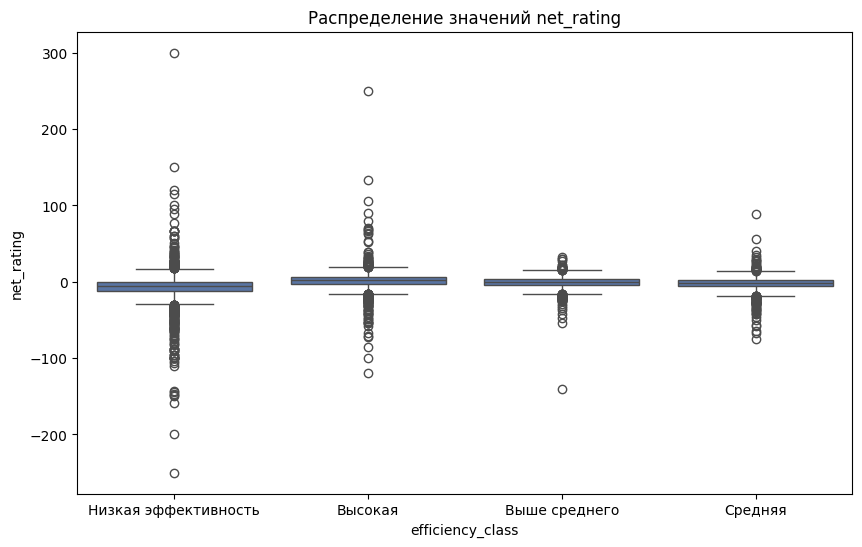

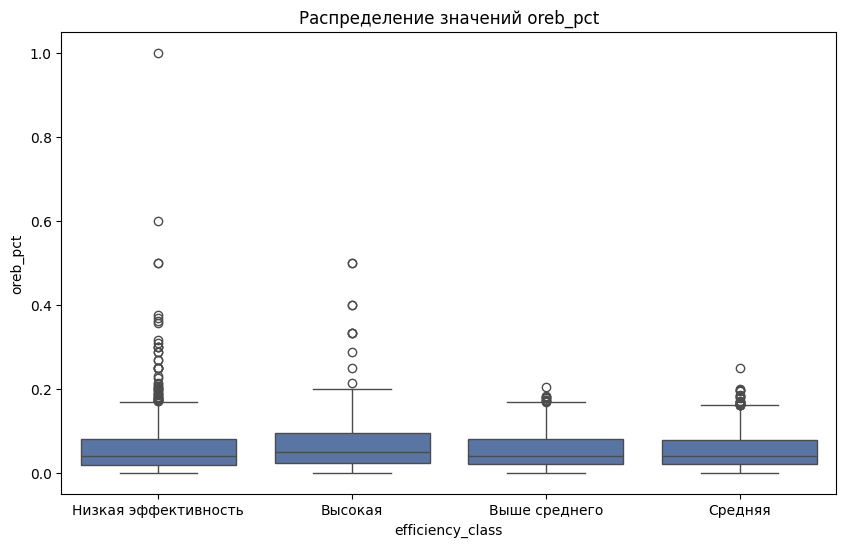

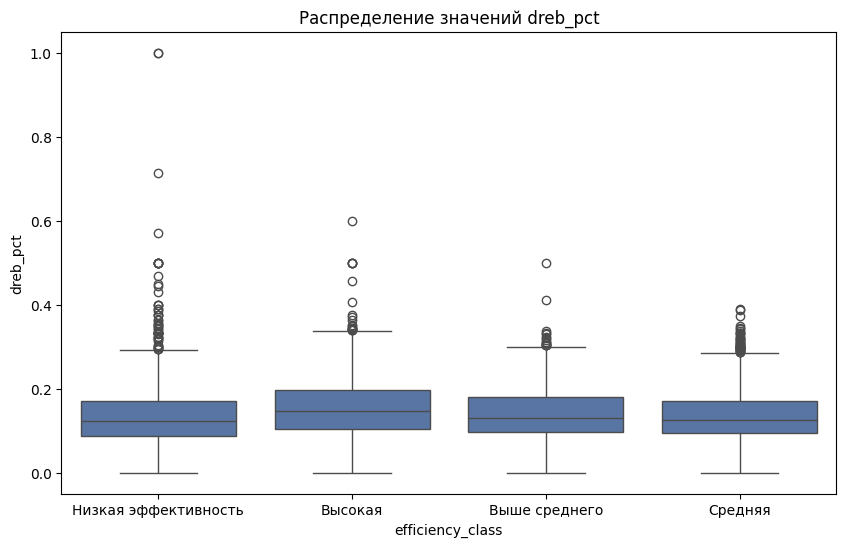

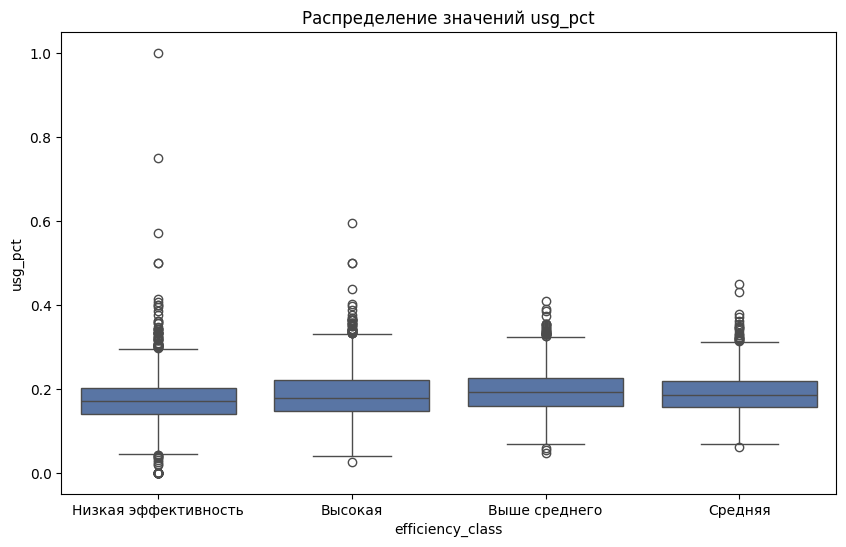

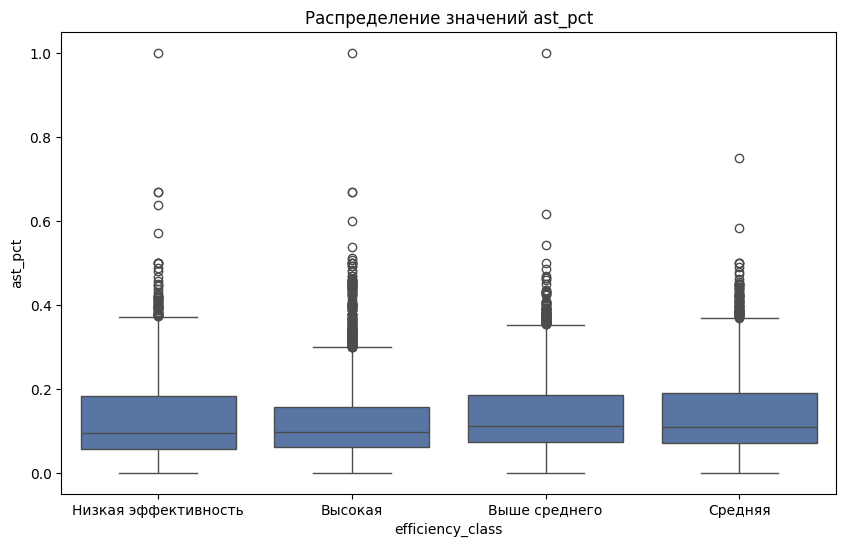

In [73]:
#–î–ª—è —á–∏—Å–ª–µ–Ω–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns[1:]:

    if col != 'ts_pct':
      fig = plt.figure()

      sns.boxplot(y=col, x=df['efficiency_class'], data=df)
      plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π {col}')
      plt.show()

In [74]:
df.select_dtypes(include=['object']).columns

Index(['player_name', 'team_abbreviation', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'season', 'efficiency_class'],
      dtype='object')

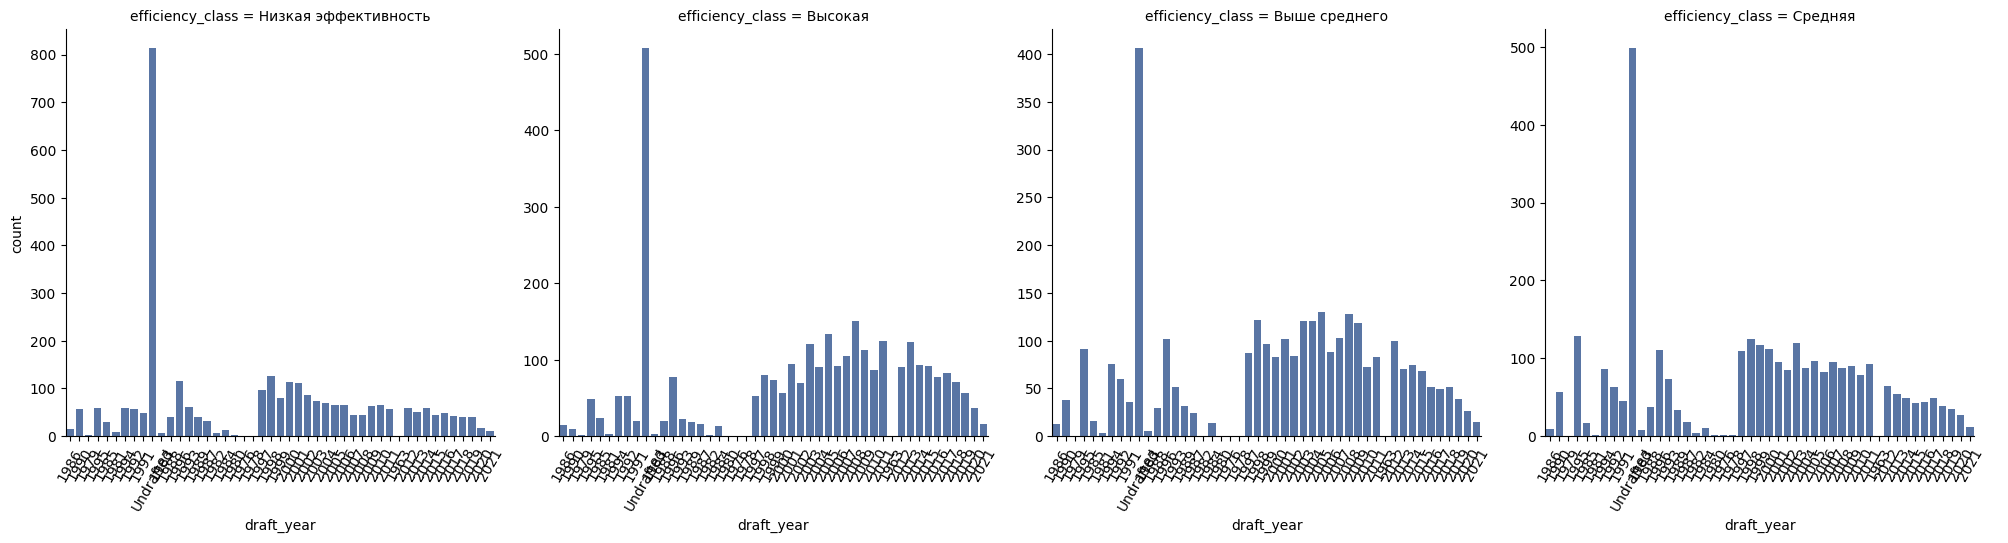

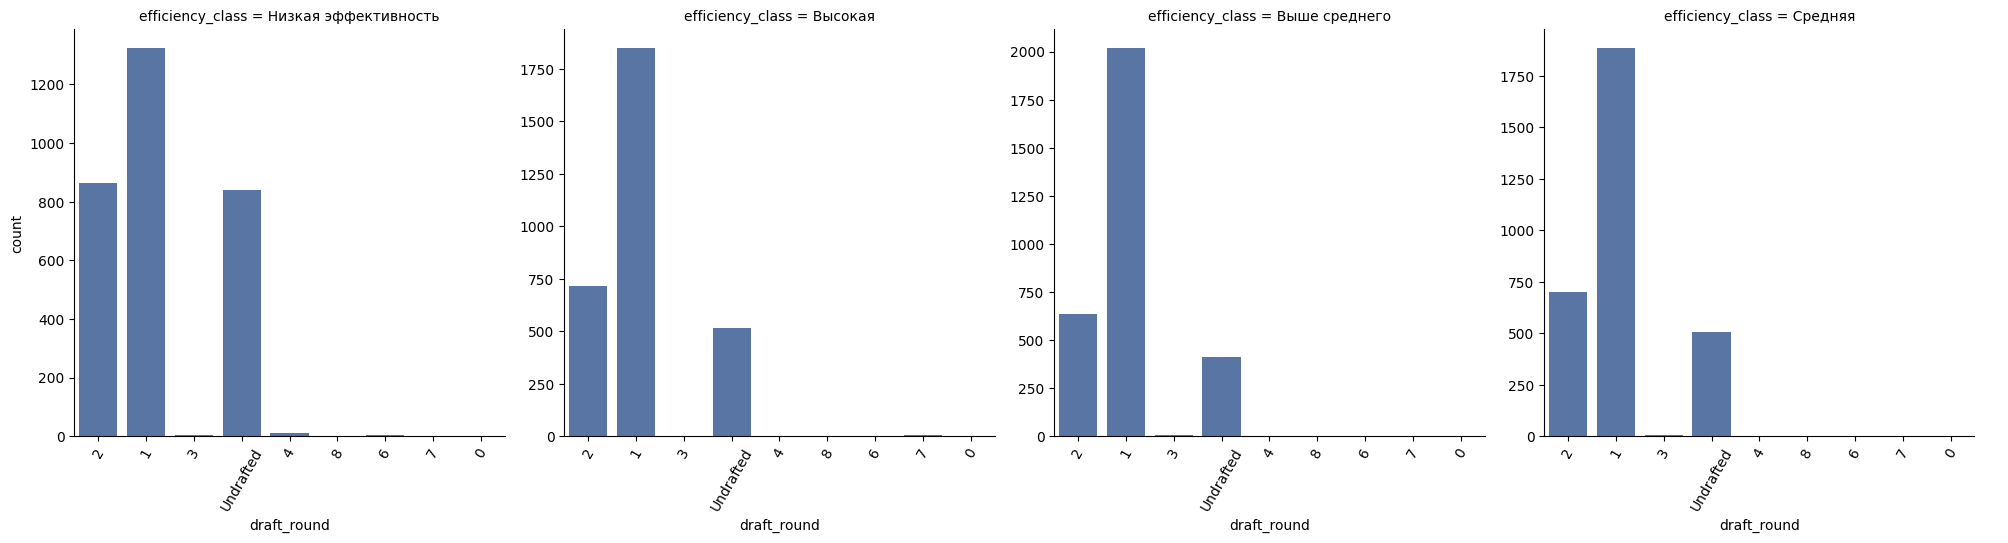

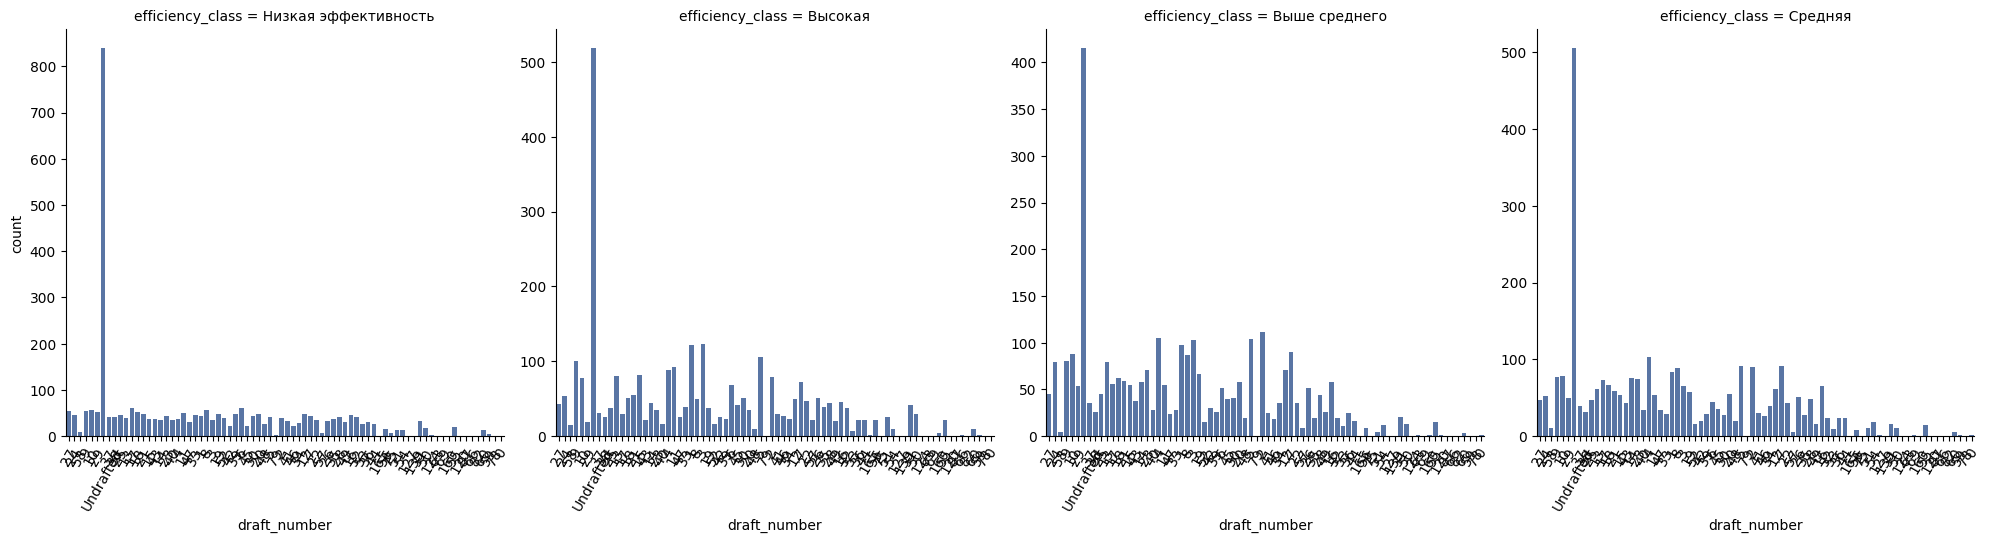

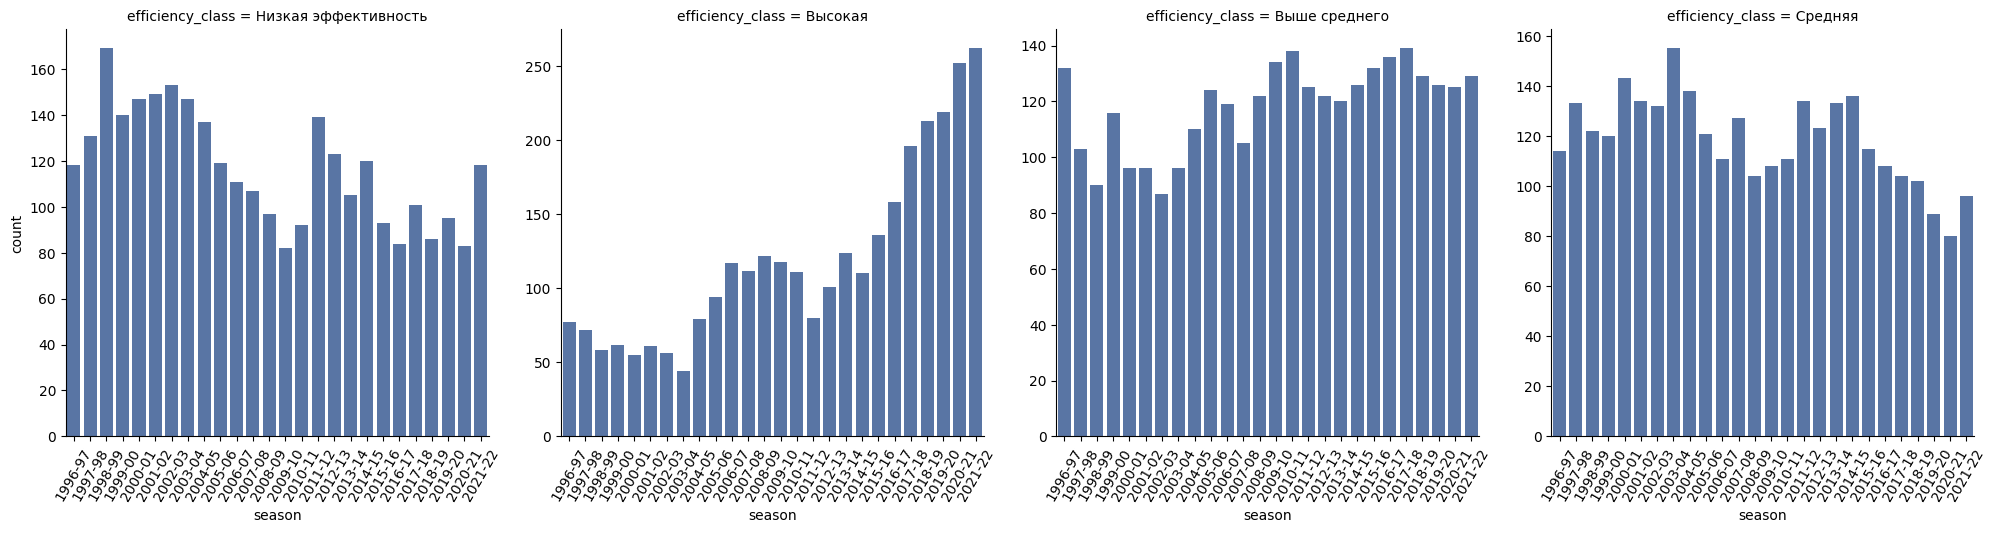

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# –í—ã–±–æ—Ä –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
categorical_columns = ['draft_year',
       'draft_round', 'draft_number', 'season']

for col in categorical_columns:
        g = sns.catplot(x=col, kind='count', col='efficiency_class', data=df, sharey=False)
        g.set_xticklabels(rotation=60)

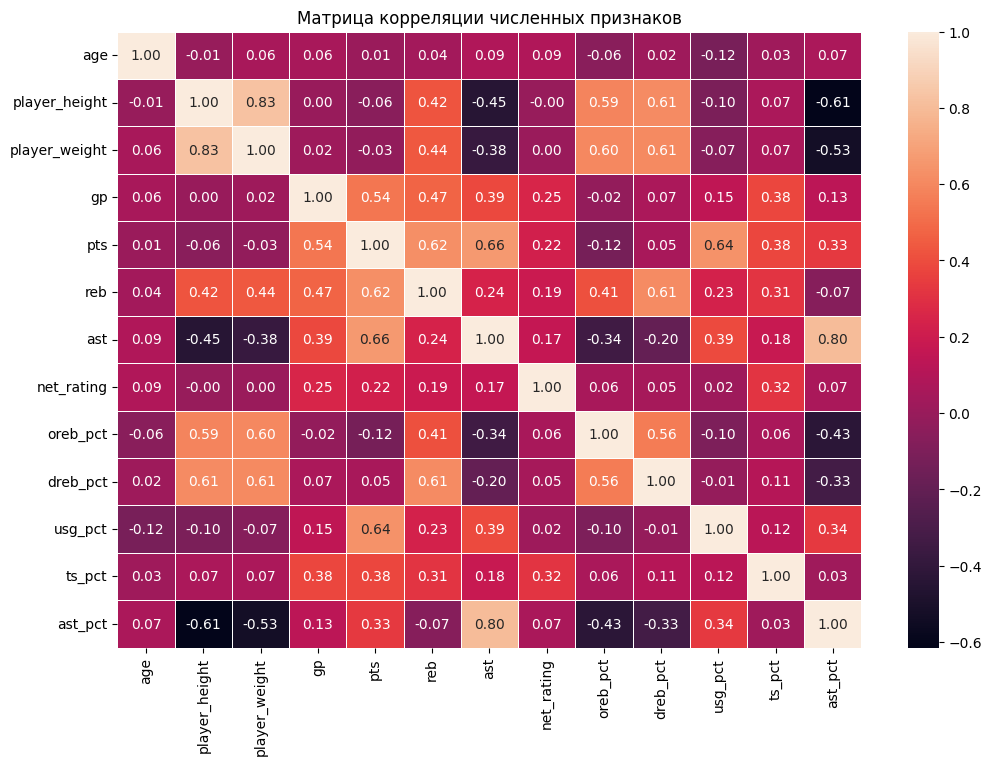

In [76]:
#–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –≤—ã–±–æ—Ä –Ω–∞–∏–±–æ–ª–µ–µ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏—Ö —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —á–∏—Å–ª–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.show()


In [77]:
tc_pct_corr = correlation_matrix['ts_pct'].sort_values(ascending=False)

In [78]:
tc_pct_corr

ts_pct           1.000000
pts              0.376571
gp               0.375816
net_rating       0.316474
reb              0.314569
ast              0.176083
usg_pct          0.123368
dreb_pct         0.107036
player_height    0.072154
player_weight    0.068142
oreb_pct         0.061805
age              0.025175
ast_pct          0.025034
Name: ts_pct, dtype: float64

In [79]:
#–û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
features = tc_pct_corr[tc_pct_corr > 0.15].index.tolist()

In [80]:
#–ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π —á–∏—Å–ª–æ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
mapping_dict = {'–ù–∏–∑–∫–∞—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å': 0, '–°—Ä–µ–¥–Ω—è—è': 1, '–í—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ': 2, '–í—ã—Å–æ–∫–∞—è': 3}
df['efficiency_class_numeric'] = df['efficiency_class'].map(mapping_dict)

In [81]:
X = df[features].drop('ts_pct', axis = 1)
y = df['efficiency_class_numeric']
#–†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

###SVM

In [82]:
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True))
])

svm_pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(probability=True))])

In [83]:
#–ü—Ä–æ—Å–º–æ—Ç—Ä —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
y_pred = svm_pipe.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.549     0.753     0.635       596
           1      0.398     0.358     0.377       625
           2      0.417     0.348     0.379       630
           3      0.494     0.449     0.470       610

    accuracy                          0.474      2461
   macro avg      0.464     0.477     0.465      2461
weighted avg      0.463     0.474     0.463      2461



###GradientBoosting

In [84]:
gb_clf = GradientBoostingClassifier()

gb_clf.fit(X_train, y_train)

print(classification_report(y_test, gb_clf.predict(X_test), digits=3))


              precision    recall  f1-score   support

           0      0.566     0.727     0.636       596
           1      0.396     0.362     0.378       625
           2      0.409     0.365     0.386       630
           3      0.500     0.462     0.480       610

    accuracy                          0.476      2461
   macro avg      0.468     0.479     0.470      2461
weighted avg      0.466     0.476     0.468      2461



In [89]:
feature_names = X.columns

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
gb_feature_importances = gb_clf.feature_importances_

for feature_name, importance in zip(feature_names, gb_feature_importances):
    print(f"{feature_name}: {importance}")

pts: 0.5586844977609551
gp: 0.07153971666694019
net_rating: 0.19617179546853136
reb: 0.06516138374485715
ast: 0.10844260635871615


###RandomForest

In [85]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

print(classification_report(y_test, rf_clf.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.569     0.686     0.622       596
           1      0.352     0.317     0.333       625
           2      0.367     0.337     0.351       630
           3      0.457     0.451     0.454       610

    accuracy                          0.445      2461
   macro avg      0.436     0.448     0.440      2461
weighted avg      0.434     0.445     0.438      2461



In [92]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
rf_feature_importances = rf_clf.feature_importances_

for feature_name, importance in zip(feature_names, rf_feature_importances):
    print(f"{feature_name}: {importance}")

pts: 0.2527072329016911
gp: 0.18369682861942424
net_rating: 0.2241013871640905
reb: 0.18040014687915124
ast: 0.1590944044356429
